# Processing Observational Cluster Magnitudes

In [13]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from isochrones.mist import MIST_Isochrone
from isochrones.mist import MISTModelGrid

In [14]:
# --- Plot Parameters ---- 
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["figure.dpi"] = 100
plt.rc('font', family = 'serif', serif = 'cmr10') 
plt.rcParams.update({# Use mathtext, not LaTeX
                            'text.usetex': False,
                            # Use the Computer modern font
                            'font.family': 'serif',
                            'font.serif': 'cmr10',
                            'mathtext.fontset': 'cm',
                            })
plt.rcParams.update({'font.size': 22})
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
colour_arrays = ['red', 'blue', 'green', 'crimson', 'lime']

# MIST Isochrone Fitting Test

In [26]:
iso = MIST_Isochrone(bands=['B','V'])

In [16]:
def lin_func(x, m, c):
    return m*x + c 

## Magnitude Calibration Parameters



In [17]:
mag_params = pd.read_csv('magnitude_cal.csv')
mag_params

,target,slope,constant,slope_err,constant_err
0,berkeley28_B,0.971244,23.975025,0.021307,0.177514
1,berkeley28_V,1.001256,24.526199,0.005840,0.057108
2,Bochum2_B,1.020409,24.677540,0.010366,0.095138
3,Bochum2_V,1.045326,25.174370,0.015138,0.158771
4,NGC2324_B,0.987966,24.082465,0.014919,0.140935
5,NGC2324_V,1.103228,25.465649,0.001510,0.016055
6,NGC2355_B,1.015697,24.756676,0.005128,0.051794
7,NGC2355_V,1.085197,25.624728,0.012554,0.126313


# Distance Estimations 

In [19]:
zeropoint = lin_func(0, mag_params['slope'][2], mag_params['constant'][2])
print(zeropoint)

24.67753957


## Bochum 2 

In [20]:
raw_mags = pd.read_csv('raw_cluster_mags/bochum2.csv')

raw_B = raw_mags['Bmag']
raw_V = raw_mags['Vmag']

cal_B = lin_func(raw_B, mag_params['slope'][2], mag_params['constant'][2])
cal_V = lin_func(raw_V, mag_params['slope'][3], mag_params['constant'][3])

In [21]:
V_e, BV_e = np.loadtxt('bochum2_WEBDA.txt', unpack = True, usecols=(2, 3), skiprows = 1 )

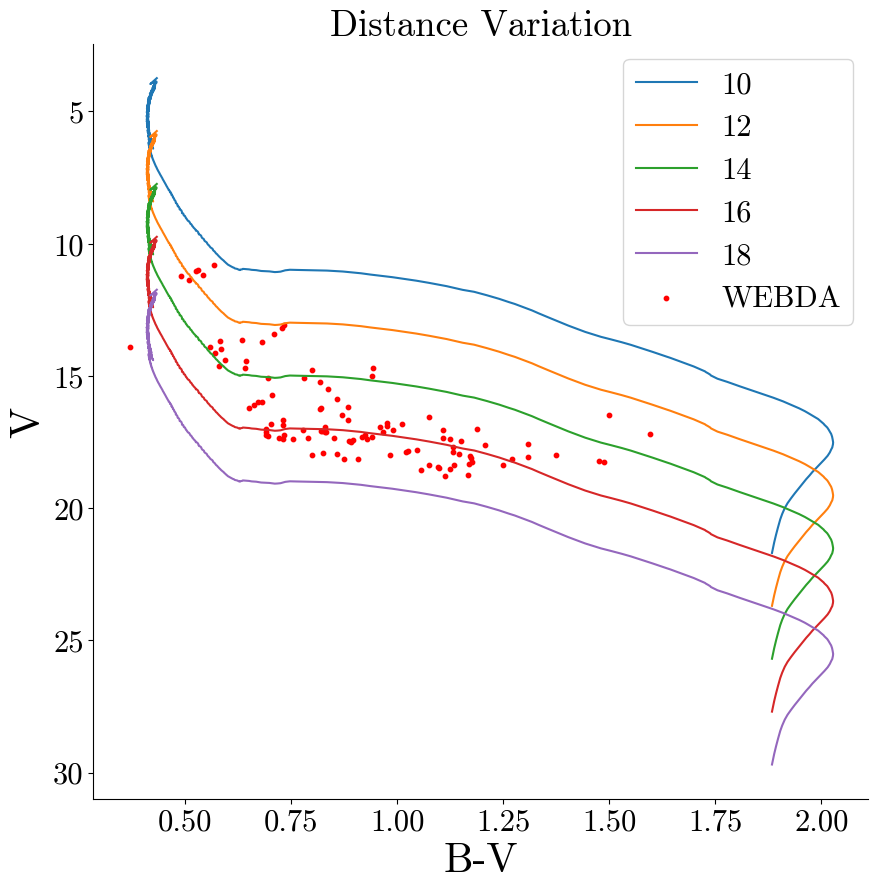

In [58]:
bv = cal_B - cal_V

isochrone = iso.isochrone(age = 6.664, feh = 0.019)

for dist_mod in np.arange(10, 20, 2):
    modelv = isochrone['V_mag'] + dist_mod
    modelbv = (isochrone['B_mag'] - isochrone['V_mag']) + .7

    plt.plot(modelbv, modelv, label = dist_mod)

# --- Plotting Bochum 2 --- 

# plt.scatter(bv, cal_V, s = 10, color = 'blue')
plt.scatter(BV_e, V_e, label = 'WEBDA', color = 'red', s = 10)
plt.gca().invert_yaxis()
plt.ylabel('V')
plt.xlabel('B-V')
plt.title('Distance Variation')
plt.legend()

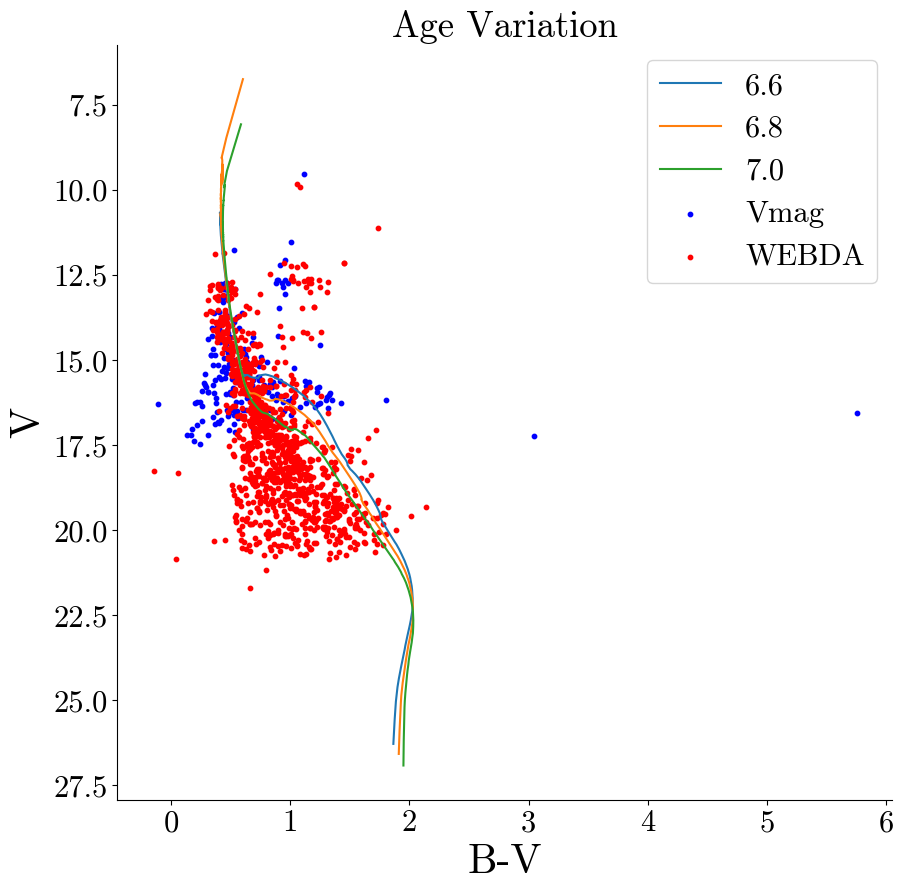

In [77]:
bv = cal_B - cal_V

for agev in np.arange(6.6, 7, 0.2):
    isochrone = iso.isochrone(age = agev, feh = 0.019)
    modelv = isochrone['V_mag'] + 14.7
    modelbv = (isochrone['B_mag'] - isochrone['V_mag']) + .7

    plt.plot(modelbv, modelv, label = agev)

# --- Plotting Bochum 2 --- 

plt.scatter(bv, cal_V, s = 10, color = 'blue')
plt.scatter(BV_e, V_e, label = 'WEBDA', color = 'red', s = 10)
plt.gca().invert_yaxis()
plt.ylabel('V')
plt.xlabel('B-V')
plt.title('Age Variation')
plt.legend()

# Berkeley 28 

/var/folders/9k/zxw1zx552m142q6419p6yn7c0000gn/T/ipykernel_95345/1423152943.py:11: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.scatter(bv, cal_V, s = 10, label = 'Obs.', color = 'blue')


Text(0.5, 0, 'B-V')

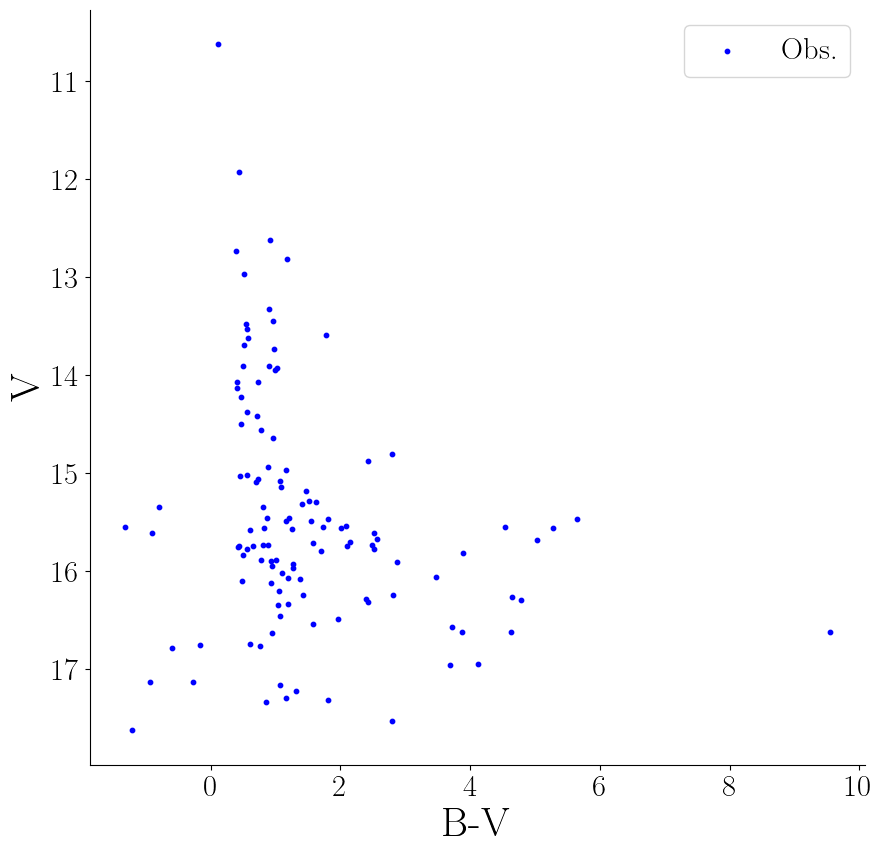

In [ ]:
raw_mags = pd.read_csv('raw_cluster_mags/berkeley28.csv')

raw_B = raw_mags['Bmag']
raw_V = raw_mags['Vmag']

cal_B = lin_func(raw_B, mag_params['slope'][0], mag_params['constant'][0])
cal_V = lin_func(raw_V, mag_params['slope'][1], mag_params['constant'][1])

bv = cal_B - cal_V

plt.scatter(bv, cal_V, s = 10, label = 'Obs.', color = 'blue')
plt.legend(loc = 'best')
plt.gca().invert_yaxis()
plt.ylabel('V')
plt.xlabel('B-V')

# NGC2324

Text(0.5, 0, 'B-V')

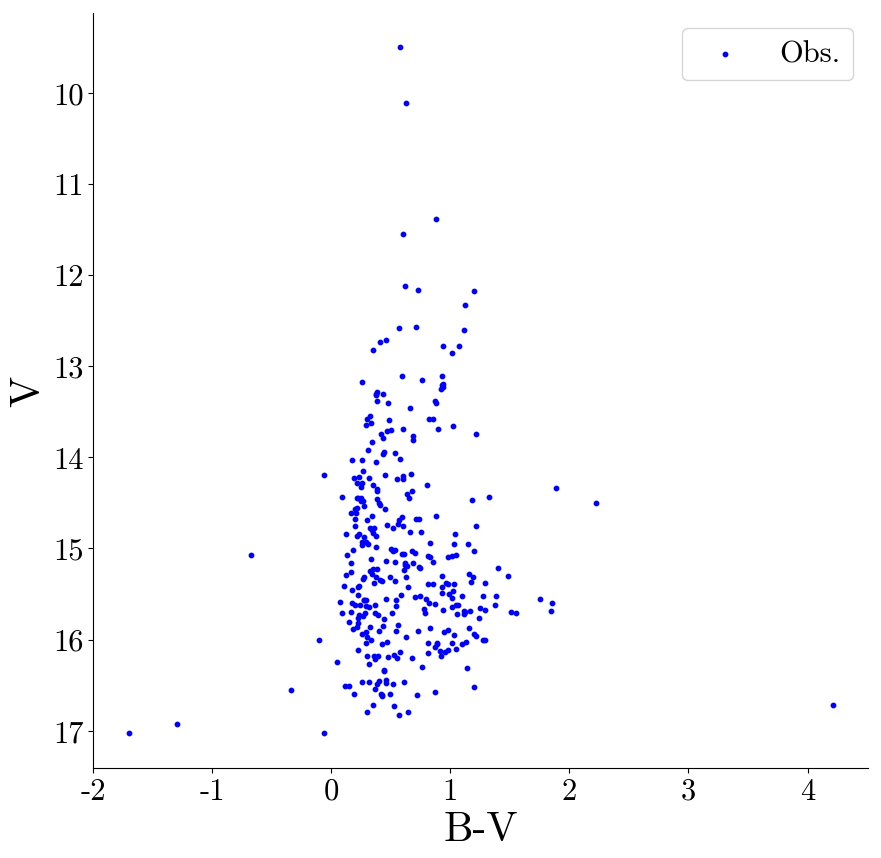

In [80]:
raw_mags = pd.read_csv('raw_cluster_mags/NGC2324.csv')

raw_B = raw_mags['Bmag']
raw_V = raw_mags['Vmag']

cal_B = lin_func(raw_B, mag_params['slope'][4], mag_params['constant'][4])
cal_V = lin_func(raw_V, mag_params['slope'][5], mag_params['constant'][5])

bv = cal_B - cal_V

plt.scatter(bv, cal_V, s = 10, label = 'Obs.', color = 'blue')
plt.legend(loc = 'best')
plt.gca().invert_yaxis()
plt.ylabel('V')
plt.xlabel('B-V')

# V_e, BV_e = np.loadtxt('NGC2324_WEBDA.txt', unpack = True, usecols=(2, 3), skiprows = 1)

# print(V_e, BV_e)

# NGC2355 

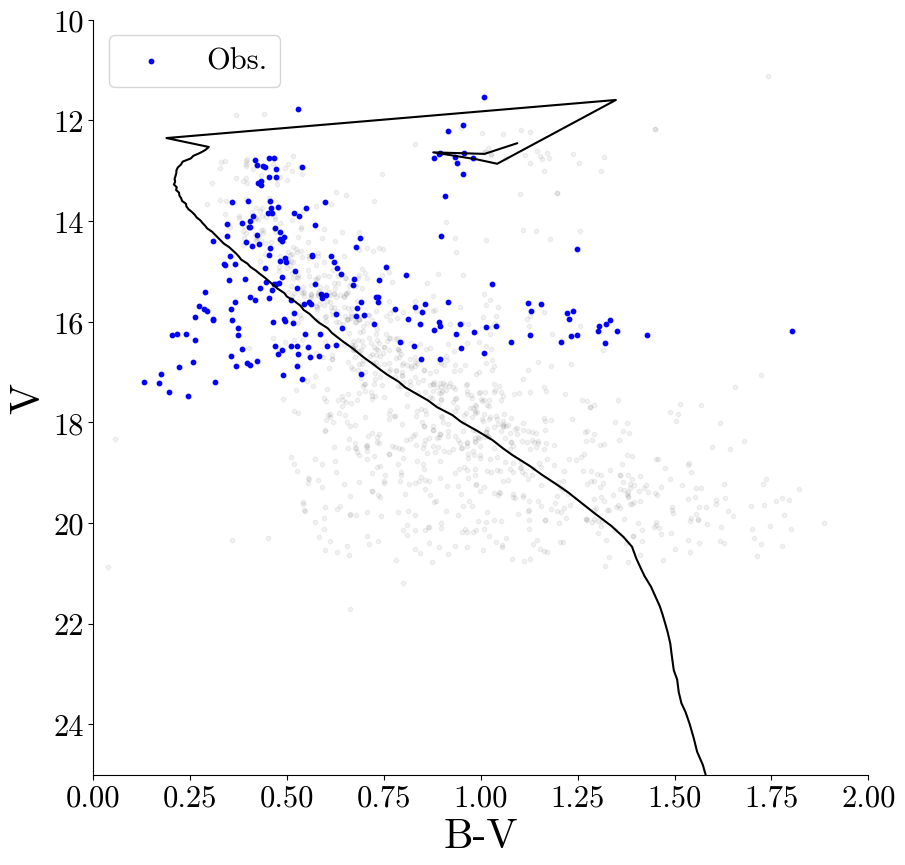

In [82]:
raw_mags = pd.read_csv('raw_cluster_mags/NGC2355.csv')

raw_B = raw_mags['Bmag']
raw_V = raw_mags['Vmag']

cal_B = lin_func(raw_B, mag_params['slope'][6], mag_params['constant'][6])
cal_V = lin_func(raw_V, mag_params['slope'][7], mag_params['constant'][7])

bv = cal_B - cal_V

plt.scatter(bv, cal_V, s = 10, label = 'Obs.', color = 'blue')
plt.legend(loc = 'best')

plt.ylabel('V')
plt.xlabel('B-V')

V_e, BV_e = np.loadtxt('NGC2355_WEBDA.txt', unpack = True, usecols=(2, 3), skiprows = 1)

plt.scatter(BV_e, V_e, label = 'WEBDA', color = 'black', s = 10, alpha=0.05)

isochrone = iso.isochrone(age = 8.85)

modelv = isochrone['V_mag'] + 12.08
modelbv = (isochrone['B_mag'] - isochrone['V_mag']) + .12
plt.plot(modelbv, modelv, 'k')

plt.xlim(0, 2)
plt.ylim(10, 25)
plt.gca().invert_yaxis()